In [1]:
from legendre.data_utils.GP_data_utils import generate_gp_data
from legendre.models.poly_utils import get_cns, get_mu_covar
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X1, y1, X2, y2, post_cov = generate_gp_data(n1 = 5,n2 = 500,ny = 500, l_kernel = 10)

In [3]:
# compute coefficients
cns = get_cns(X2[:,0], y2.T, degree = 10)
#reconstructions
recs = np.polynomial.legendre.legval( X2[:,0], cns)

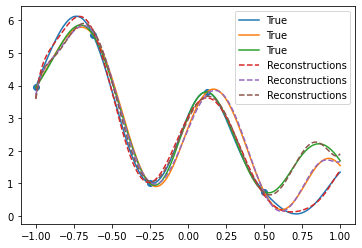

In [4]:
#Plotting only 3 posterior trajectories
plt.scatter(X1,y1)
plt.plot(X2,y2.T[:,:3],label = "True")

#Plotting 3 reconstructions
plt.plot(X2,recs.T[:,:3], linestyle = "--", label = "Reconstructions")

plt.legend()
plt.show()

## Sampling trajectories from the estimated density of the coefficients

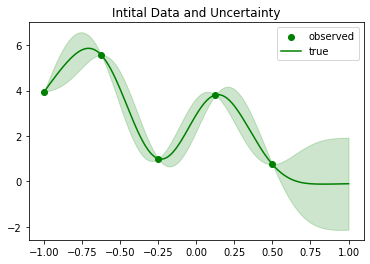

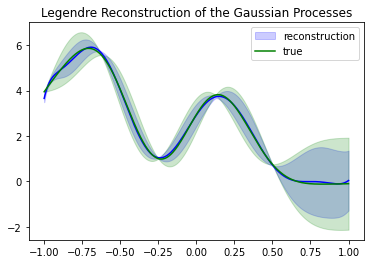

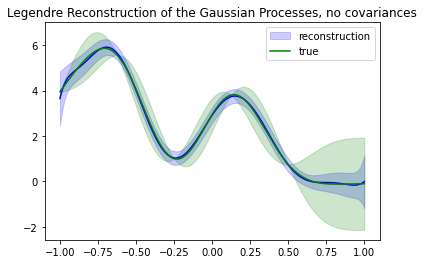

In [5]:
n_samples = 500
mu, cov = get_mu_covar(cns)
sampled_cns = (cov @ np.random.randn(cns.shape[0],n_samples)) + mu[:,None]
sampled_recs = np.polynomial.legendre.legval( X2[:,0], sampled_cns)


plt.figure()
plt.scatter(X1,y1,color = "green", label = "observed")
plt.plot(X2, y2.mean(0),color = "green", label = "true")
plt.fill_between(X2[:,0], y2.mean(0) + 1.96*y2.std(0), y2.mean(0) - 1.96*y2.std(0), color = "green", alpha = 0.2)
plt.title("Intital Data and Uncertainty")
plt.legend()
plt.show()


plt.figure()
plt.plot(X2, sampled_recs.mean(0),color = "blue")
plt.fill_between(X2[:,0], sampled_recs.mean(0) + 1.96*sampled_recs.std(0), sampled_recs.mean(0) - 1.96*sampled_recs.std(0), color = "blue", alpha = 0.2, label = "reconstruction")

plt.plot(X2, y2.mean(0),color = "green", label = "true")
plt.fill_between(X2[:,0], y2.mean(0) + 1.96*y2.std(0), y2.mean(0) - 1.96*y2.std(0), color = "green", alpha = 0.2)
plt.title("Legendre Reconstruction of the Gaussian Processes")
plt.legend()
plt.show()


n_samples = 500
mu, cov = get_mu_covar(cns)
sampled_cns = (cov * np.eye(cov.shape[0]) @ np.random.randn(cns.shape[0],n_samples)) + mu[:,None]
sampled_recs = np.polynomial.legendre.legval( X2[:,0], sampled_cns)
#plt.plot(X2,sampled_recs.T[:,:5])
plt.figure()
plt.plot(X2, sampled_recs.mean(0),color = "blue")
plt.fill_between(X2[:,0], sampled_recs.mean(0) + 1.96*sampled_recs.std(0), sampled_recs.mean(0) - 1.96*sampled_recs.std(0), color = "blue", alpha = 0.2, label = "reconstruction")

plt.plot(X2, y2.mean(0),color = "green", label = "true")
plt.fill_between(X2[:,0], y2.mean(0) + 1.96*y2.std(0), y2.mean(0) - 1.96*y2.std(0), color = "green", alpha = 0.2)
plt.title("Legendre Reconstruction of the Gaussian Processes, no covariances")
plt.legend()
plt.show()

## Studying the impact of input variance on the variance of coefficients

In [7]:
kernel_ls = [i+1 for i in range(10)]
mus = []
covs = []
for kernel_l in kernel_ls:
    X1, y1, X2, y2, _ = generate_gp_data(n1 = 5,n2 = 100,ny = 100, l_kernel = kernel_l)
    cns = get_cns(X2[:,0], y2.T, degree = 5)
    mu, cov = get_mu_covar(cns)
    mus.append(mu)
    covs.append(cov)
mus = np.stack(mus)
covs = np.stack(covs)

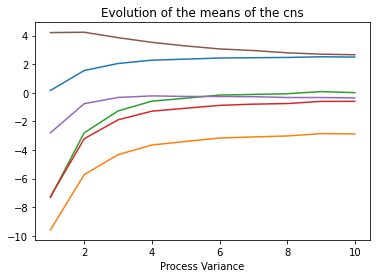

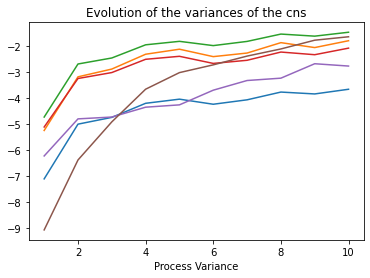

In [8]:
plt.plot(kernel_ls,mus)
plt.title("Evolution of the means of the cns")
plt.xlabel("Process Variance")
plt.show()
plt.figure()
plt.plot(kernel_ls,np.log(covs[:,np.arange(covs.shape[1]),np.arange(covs.shape[1])]))
plt.title("Evolution of the variances of the cns")
plt.xlabel("Process Variance")
plt.show()